In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
img = cv2.imread("Lenna.png", 0)
print(img)

[[169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 ...
 [ 53  53  59 ... 115 112 114]
 [ 53  53  64 ... 117 118 122]
 [ 53  53  64 ... 117 118 122]]


In [3]:
a = [[1/16, 2/16, 1/16], [2/16, 4/16, 2/16], [1/16, 2/16, 1/16]]

In [4]:
def fft(f):
    M = len(f)
    
    if(M<=1):
        return f
    
    even = f[0::2]
    odd = f[1::2]
    
    G = fft(even)
    H = fft(odd)
    
    #print(G, H, M)
    
    T = []
    #print('H: ', H)
    for i in range(M//2):
        #print(i)
        T.append((np.exp((-2j)*np.pi*i/M))*H[i])
    
    F1 = []
    F2 = []
    for i in range(M//2):
        F1.append(G[i] + T[i])
        F2.append(G[i] - T[i])
    
    F = F1+F2
    #print(F)
    return F

In [5]:
a = [1, 2, 3]
b = fft(a)
print(b)

[(6+0j), (2+0j)]


In [6]:
def ifft(f):
    M = len(f)
    
    if(M<=1):
        return f
    
    even = f[0::2]
    odd = f[1::2]
    
    G = ifft(even)
    H = ifft(odd)
    
    T = []
    for i in range(M//2):
        T.append((np.exp((2j)*np.pi*i/M))*H[i])
    
    F1 = []
    F2 = []
    for i in range(len(H)):
        F1.append(G[i] + T[i])
        F2.append(G[i] - T[i])
    
    F = F1+F2
    return F

In [7]:
c = ifft(b)
print(c)

[(8+0j), (4+0j)]


In [8]:
print(np.fft.fft(a))

[ 6. +0.j        -1.5+0.8660254j -1.5-0.8660254j]


In [13]:
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)


In [11]:
def gaussian_kernel(size, sigma=1, verbose=False):
 
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
 
    kernel_2D *= 1.0 / kernel_2D.max()
 
    if verbose:
        plt.imshow(kernel_2D, interpolation='none',cmap='gray')
        plt.title("Image")
        plt.show()
 
    return kernel_2D

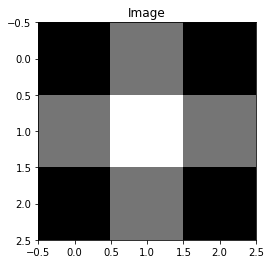

array([[0.71653131, 0.84648172, 0.71653131],
       [0.84648172, 1.        , 0.84648172],
       [0.71653131, 0.84648172, 0.71653131]])

In [35]:
a = gaussian_kernel(3, math.sqrt(3), True)
a

In [28]:
sigma=math.sqrt(512)

22.627416997969522